# Линейные модели

In [1]:
import sklearn
sklearn.__version__

'1.1.3'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Линейная регрессия

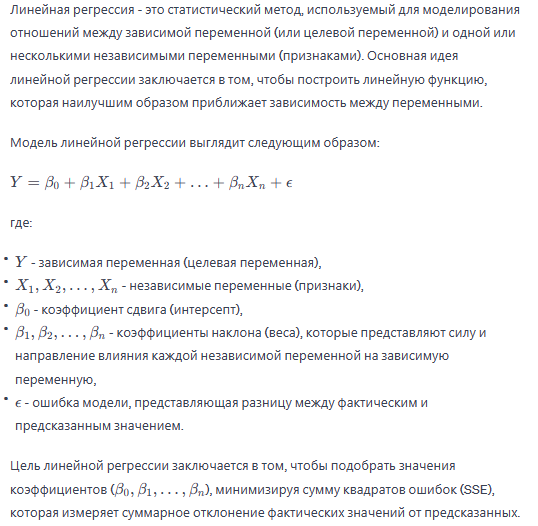

In [3]:
# создание игрушечных данных с демонстрацией параметров
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y = np.array([2, 4, 5, 4, 5, 8, 9, 10, 11, 12])

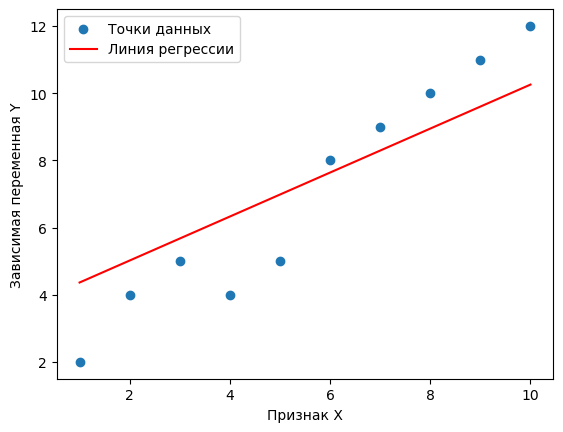

In [4]:
# Предсказанные значения по модели (свободный член и наклон)
Y_pred = 3.7091 + 0.6545 * X

plt.scatter(X, Y, label='Точки данных')
plt.plot(X, Y_pred, color='red', label='Линия регрессии')
plt.xlabel('Признак X')
plt.ylabel('Зависимая переменная Y')
plt.legend()
plt.show()

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston_info = load_boston()

C:\Users\dermi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [7]:
data_boston = pd.DataFrame(boston_info.data, columns=boston_info.feature_names);
data_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
target_boston = boston_info.target  # нампаевский массив "ответов"

In [9]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_boston, target_boston, random_state=11)

In [11]:
# пример множественной линейной регрессии (несколько признаков)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

print(f'R-квадрат на тренировочном наборе: {lin_reg.score(X_train, y_train):.2}')
print(f'R-квадрат на тестовом наборе: {lin_reg.score(X_test, y_test):.2}')

R-квадрат на тренировочном наборе: 0.75
R-квадрат на тестовом наборе: 0.68


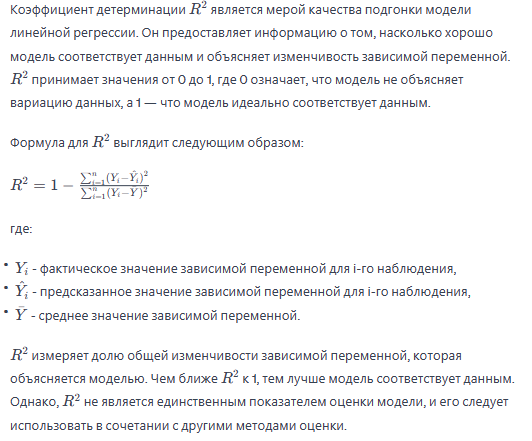

**Стандартная линейная регрессия склонна к переобучению (это видно по несоответствию качеством модели на обучающем наборе и тестовом)** Можно ли отрегулировать сложность линейной регрессии?

## Регуляризация

### Гребневая регрессия (регуляризация L2)

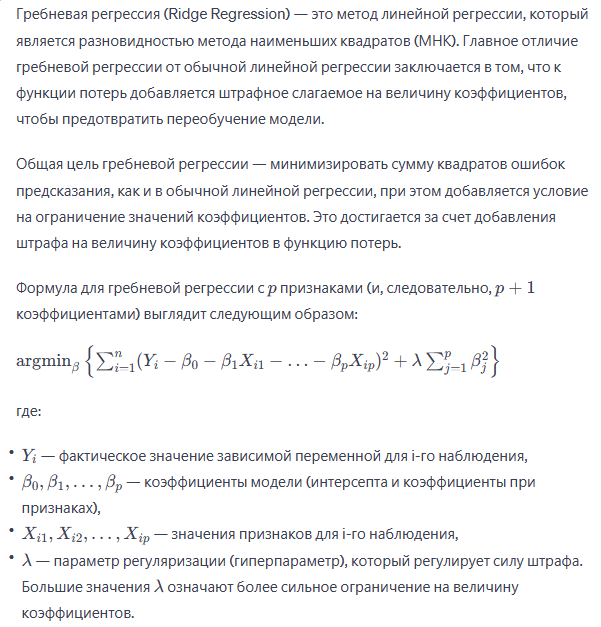

In [12]:
from sklearn.linear_model import Ridge   # L2 регуляризация

In [13]:
ridge1 = Ridge() # параметр alpha по умолчанию 1
ridge1.fit(X_train, y_train)

print(f'R-квадрат на тренировочном наборе: {ridge1.score(X_train, y_train):.2}')
print(f'R-квадрат на тестовом наборе: {ridge1.score(X_test, y_test):.2}')

R-квадрат на тренировочном наборе: 0.75
R-квадрат на тестовом наборе: 0.69


Параметр alpha является ограничителем, который штрафует за большие значения. Это один из способов регуляризации (штрафа за большие веса). **Чем больше этот параметр, тем большие ограничения мы ставим для весов, приближая коэффициенты к нулю**.

In [14]:
ridge01 = Ridge(alpha=10)
ridge01.fit(X_train, y_train)

print(f'R-квадрат на тренировочном наборе: {ridge01.score(X_train, y_train):.2}')
print(f'R-квадрат на тестовом наборе: {ridge01.score(X_test, y_test):.2}')

ridge01.coef_

R-квадрат на тренировочном наборе: 0.74
R-квадрат на тестовом наборе: 0.69


array([-9.15211679e-02,  5.19916798e-02, -4.79884903e-02,  1.83944541e+00,
       -2.00383835e+00,  4.15992053e+00,  8.03647185e-04, -1.16203805e+00,
        3.01148488e-01, -1.58269821e-02, -7.18897785e-01,  1.17007107e-02,
       -5.40018253e-01])

При достаточном объеме
обучающих данных регуляризация становится менее важной и при 
удовлетворительном объеме данных гребневая и линейная регрессии
будут демонстрировать одинаковое качество работы

## Лассо регрессия (регуляризация L1)

Альтернативой Ridge как метода регуляризации линейной регрессии 
является **Lasso**. Как и гребневая регрессия, лассо также сжимает 
коэффициенты до близких к нулю значений, но несколько иным
способом, называемым L1 регуляризацией. 
Результат L1 регуляризации 
заключается в том, что при использовании лассо **некоторые 
коэффициенты становятся ТОЧНО равны нулю**. Получается, что 
некоторые признаки полностью исключаются из модели. Это можно 
рассматривать как один из видов автоматического отбора признаков.
Получение нулевых значений для некоторых коэффициентов часто 
упрощает интерпретацию модели и может выявить наиболее важные 
признаки вашей модели.

In [15]:
from sklearn.linear_model import Lasso

In [16]:
lasso1 = Lasso() # параметр регуляризации alpha по умолчанию равен 1 
lasso1.fit(X_train, y_train)

print(f'R-квадрат на тренировочном наборе: {lasso1.score(X_train, y_train):.2}')
print(f'R-квадрат на тестовом наборе: {lasso1.score(X_test, y_test):.2}')
print('Заметим, что результаты являются следствием недообучения, поскольку низкие даже для тренировочного набора')

R-квадрат на тренировочном наборе: 0.69
R-квадрат на тестовом наборе: 0.66
Заметим, что результаты являются следствием недообучения, поскольку низкие даже для тренировочного набора


In [17]:
# понизм параметр регуляризации
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print(f'R-квадрат на тренировочном наборе: {lasso.score(X_train, y_train):.2}')
print(f'R-квадрат на тестовом наборе: {lasso.score(X_test, y_test):.2}')


R-квадрат на тренировочном наборе: 0.74
R-квадрат на тестовом наборе: 0.68


In [18]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

print(f'R-квадрат на тренировочном наборе: {lasso.score(X_train, y_train):.2}')
print(f'R-квадрат на тестовом наборе: {lasso.score(X_test, y_test):.2}')
lasso.coef_

R-квадрат на тренировочном наборе: 0.75
R-квадрат на тестовом наборе: 0.69


array([-9.55434619e-02,  4.89593994e-02,  9.17446830e-03,  2.71808025e+00,
       -1.53781708e+01,  4.40472897e+00,  9.20498041e-03, -1.34374447e+00,
        3.10541481e-01, -1.36991842e-02, -8.41847404e-01,  1.13669613e-02,
       -4.95029218e-01])

На практике, когда стоит выбор между гребневой регрессией и лассо, 
предпочтение, как правило, отдается гребневой регрессии. Однако, если 
у вас есть большое количество признаков и есть основания считать, что 
лишь некоторые из них важны, Lasso может быть оптимальным выбором. 
Аналогично, если вам нужна легко интерпретируемая модель, Lasso
поможет получить такую модель, так как она выберет лишь
подмножество входных признаков. В библиотеке scikit-learn также 
имеется класс **ElasticNet**, который сочетает в себе штрафы Lasso и Ridge. 
На практике эта комбинация работает лучше всего, впрочем, это 
достигается за счет двух корректируемых параметров: один для L1
регуляризации, а другой – для L2 регуляризации.

In [19]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.001)
elastic_net.fit(X_train, y_train)

print(f'R-квадрат на тренировочном наборе: {elastic_net.score(X_train, y_train):.2}')
print(f'R-квадрат на тестовом наборе: {elastic_net.score(X_test, y_test):.2}')

R-квадрат на тренировочном наборе: 0.75
R-квадрат на тестовом наборе: 0.69


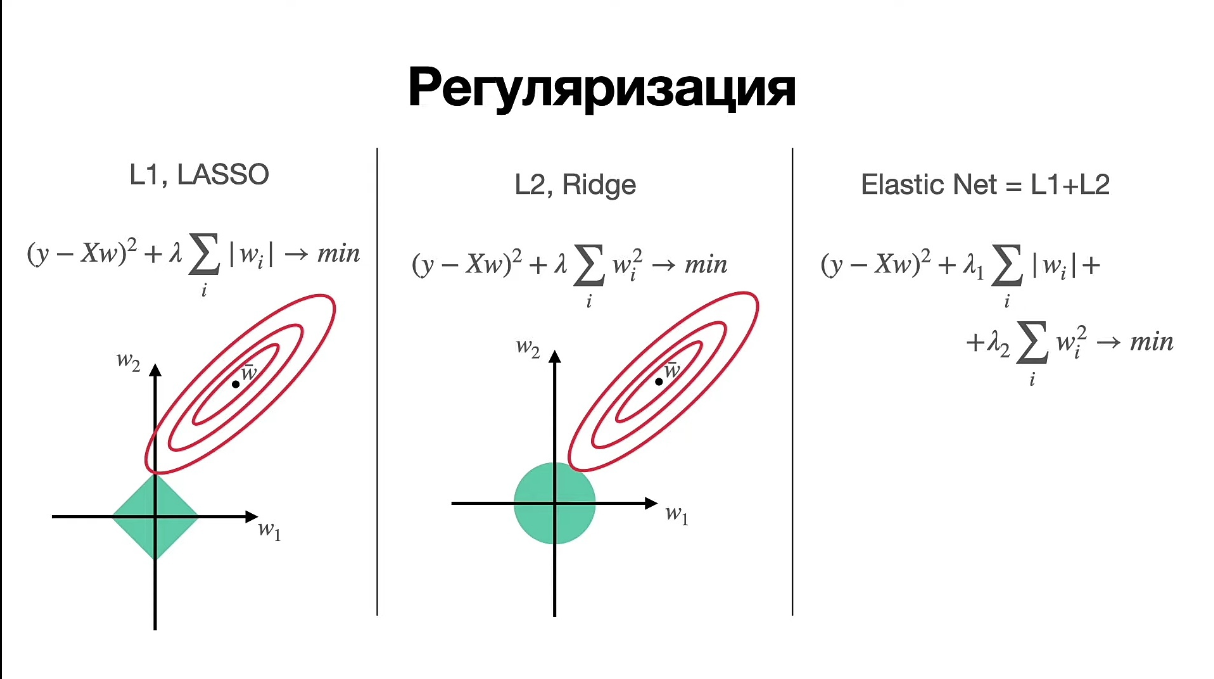

## Вывод

Основная идея линейной регрессии - **представить целевую переменную как линейную комбинацию признаков**
В стандартной линейной регрессии мы минимизируем квадрат ошибки (МНК).

Предположения линейной регрессии вытекают из теоремы Гаусаса-Маркова (ЕСЛИ данные собраны корректно, признаки не равны между собой, а ошибки носят случайный характер, распределены независимо и их дисперсия случайна, ТО оценка МНК является ОПТИМАЛЬНОЙ)

Регуляризация - штраф нашей функции за большие веса (добавление некоторого слагаемого к функционалу потерь, которая несёт в себе информацию, насколько большие веса мы выбрали в моделе) Основные типы: L1, L2 и Elastic Net (L1+L2)

#### Особенности:
- можно быстро делать предсказания
- иногда можно использоваться для отбора признаков
- легко интепретируема 
- ловит линейные зависимости 
- требует предподготовки данных (стандартизация, преобразование категориальных переменных)
- ограниченная способность моделировать сложные нелинейные взаимосвязи.
- чувствительность к выбросам в данных.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

elastic_reg = ElasticNet(alpha=0.001)
elastic_reg.fit(X_train_scaled, y_train)

print(f'R-квадрат на тренировочном наборе: {elastic_reg.score(X_train_scaled, y_train):.2}')
print(f'R-квадрат на тестовом наборе: {elastic_reg.score(X_test_scaled, y_test):.2}')